Quick experiments on the way that RMSE and Mean Absolute Error would be affected by outliers. Outliers, in this case, are taken to be the product of fat tails, and fat-tailedness is, in this case, measured in terms of the degrees of freedom of a student-t distribution with $df \geq 3$, rescaled to have unit variance. The two metrics and their standard error are compared for those fat tailed distributions relative to their result on a standard normal distribution.

Fat tailed distributions actually cluster closer to 0 than a normal distribution with the same variance, so that the mean absolute error is less than the RMSE. The RMSE is just the standard deviation, so it should be unaffected by fat tails given that variance is kept constant. The more interesting bit is the standard error on the two metrics: it is much higher for RMSE. The standard error on MAE is actually constant here, but my guess is that this is a result specific to the student-t distribution and not generally true.  

(-6.0, 6.0)

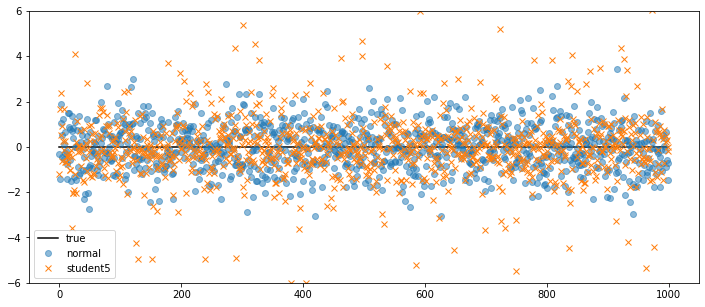

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

N = 1000
df = 5 
y_true = np.zeros(N)
y_normal = np.random.normal(size=y_true.shape)
y_outliers = np.random.standard_t(df=2,size=y_true.shape)/np.sqrt(df/(df-2))

plt.figure(figsize=(12,5))
plt.plot(y_true,'black')
plt.plot(y_normal,'o',alpha=0.5)
plt.plot(y_outliers,'x')
plt.legend(f'true,normal,student{df}'.split(','))
plt.ylim([-6,6])

In [2]:
df = 3

def simulate(N=N,df=df):

    mae_normal = []
    rmse_normal = []
    mae_outliers = []
    rmse_outliers = []

    for i in range(2500):
        y_true = np.zeros(N)
        y_normal = np.random.normal(size=y_true.shape)
        y_outliers = np.random.standard_t(df=df,size=y_true.shape)/np.sqrt(df/(df-2))

        mae_normal.append(mean_absolute_error(y_true,y_normal))
        mae_outliers.append(mean_absolute_error(y_true,y_outliers))

        rmse_normal.append(np.sqrt(mean_squared_error(y_true,y_normal)))
        rmse_outliers.append(np.sqrt(mean_squared_error(y_true,y_outliers)))
        
    return mae_normal,rmse_normal,mae_outliers,rmse_outliers

mae_normal,rmse_normal,mae_outliers,rmse_outliers = simulate()
    
print(f"For normally distributed errors:       RMSE {np.mean(rmse_normal)}+/-{np.std(rmse_normal)}\tMAE {np.mean(mae_normal)}+/-{np.std(mae_normal)}")
print(f"For student-t df={df} distributed errors: RMSE {np.mean(rmse_outliers)}+/-{np.std(rmse_outliers)}\tMAE {np.mean(mae_outliers)}+/-{np.std(mae_outliers)}")

For normally distributed errors:       RMSE 0.9990091654268234+/-0.022350304605392498	MAE 0.7971106451497436+/-0.01900329104886326
For student-t df=3 distributed errors: RMSE 0.9841548754518755+/-0.12955405678690463	MAE 0.6361124615738845+/-0.02373347152054476


Text(0.5, 1.0, 'rmse & mae as a function of "fat-tailedness"')

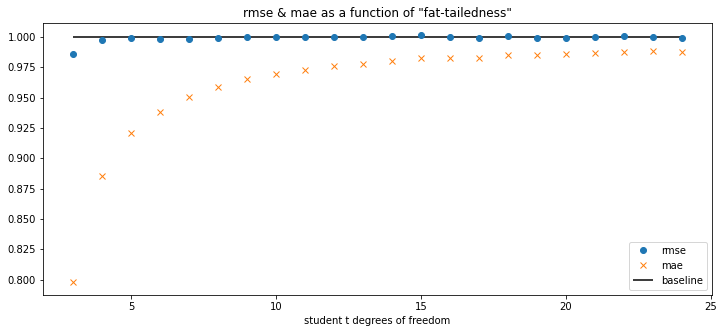

In [3]:
dfs = np.arange(3,25)

rmse_ratio = []
mae_ratio = []

for df in dfs:
    mae_normal,rmse_normal,mae_outliers,rmse_outliers = simulate(df=df)
    
    rmse_ratio.append(np.mean(rmse_outliers)/np.mean(rmse_normal))
    mae_ratio.append(np.mean(mae_outliers)/np.mean(mae_normal))
    

plt.figure(figsize=(12,5))
plt.plot(dfs,rmse_ratio,'o')
plt.plot(dfs,mae_ratio,'x')
plt.hlines(xmin=min(dfs),xmax=max(dfs),y=1,color='black')
plt.legend('rmse,mae,baseline'.split(','))
plt.xlabel('student t degrees of freedom')
plt.title('rmse & mae as a function of "fat-tailedness"')

Text(0.5, 1.0, 'standard error on rmse & mae as a function of "fat-tailedness"')

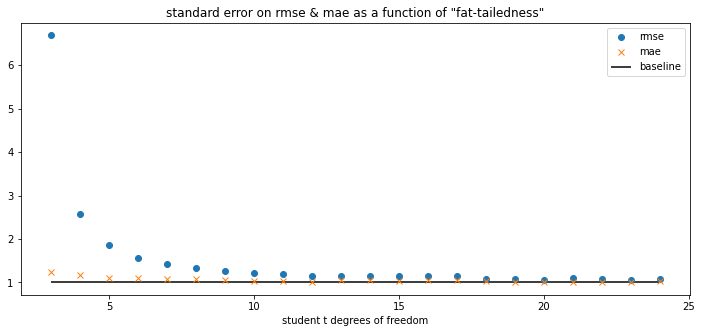

In [4]:
dfs = np.arange(3,25)

rmse_ratio = []
mae_ratio = []

for df in dfs:
    mae_normal,rmse_normal,mae_outliers,rmse_outliers = simulate(df=df)
    
    rmse_ratio.append(np.std(rmse_outliers)/np.std(rmse_normal))
    mae_ratio.append(np.std(mae_outliers)/np.std(mae_normal))
    

plt.figure(figsize=(12,5))
plt.plot(dfs,rmse_ratio,'o')
plt.plot(dfs,mae_ratio,'x')
plt.hlines(xmin=min(dfs),xmax=max(dfs),y=1,color='black')
plt.legend('rmse,mae,baseline'.split(','))
plt.xlabel('student t degrees of freedom')
plt.title('standard error on rmse & mae as a function of "fat-tailedness"')